# A/B Testing 
data from 
https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset
kaggle datasets download -d amirmotefaker/ab-testing-dataset

In [58]:
import pandas as pd 

data1 = pd.read_csv('/Users/jiyuncho/Desktop/Personal Project/SQL+TABLEAU PROJECT/Project-Walmart/my_env1/ab-testing-dataset/control_group.csv',sep=";")
data2 = pd.read_csv('/Users/jiyuncho/Desktop/Personal Project/SQL+TABLEAU PROJECT/Project-Walmart/my_env1/ab-testing-dataset/test_group.csv',sep=";")

In [59]:
#The dataset is structured such that each row contains all the information, and the values are separated by semicolons. 
#I have to split the rows 

In [60]:
data1.head()


,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data2.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [62]:
data1.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [63]:
data2.columns


Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [65]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [66]:
#Data1 and data 2 has different numnber of columns
#Data types are also differnet in #3-#9
#Data1 is the control group and data2 is the test group

In [67]:
Total=pd.concat([data1,data2], axis=0)

In [68]:
Total.sample(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
25,Control Campaign,26.08.2019,2233,124897.0,98432.0,5435.0,2847.0,2421.0,1448.0,251.0
19,Control Campaign,20.08.2019,2675,113430.0,78625.0,2578.0,1001.0,848.0,1709.0,299.0
22,Test Campaign,23.08.2019,2407,60286.0,49329.0,5077.0,2592.0,2004.0,632.0,473.0
4,Test Campaign,5.08.2019,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0
3,Test Campaign,4.08.2019,2710,78451.0,25937.0,4216.0,2216.0,1437.0,566.0,340.0


In [69]:
df = Total.rename(
    columns=lambda x: x.replace("# of ","") if x.startswith("# of ")
else x
)
df = df.rename(columns={"Campaign Nmae":"Campaign"})

In [70]:
df.head(5)

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df[df.isnull().any(axis=1)]

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_clean = df.dropna() 

#Count by campaign if they have suitable 
df_clean.dtypes 

Campaign Name      object
Date               object
Spend [USD]         int64
Impressions       float64
Reach             float64
Website Clicks    float64
Searches          float64
View Content      float64
Add to Cart       float64
Purchase          float64
dtype: object

In [73]:
# Check Objet Type 
df = df_clean.copy()

# Convert to datetime as date format
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y")

# Convert to other datatype as int64
df[df.select_dtypes(include=["float64"]).columns] = df.select_dtypes(include=["float64"]).astype("int")


In [74]:
df.dtypes

Campaign Name             object
Date              datetime64[ns]
Spend [USD]                int64
Impressions                int64
Reach                      int64
Website Clicks             int64
Searches                   int64
View Content               int64
Add to Cart                int64
Purchase                   int64
dtype: object

In [75]:
df["Date"].dt.year.value_counts()

Date
2019    59
Name: count, dtype: int64

In [76]:
# check seasonality 
df["Date"].dt.month.value_counts()

Date
8    59
Name: count, dtype: int64

### All 59 data is from August, 2019 
### divide year, month, days

In [77]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [78]:
df.head()

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,year,month,Day
0,Control Campaign,2019-08-01,2280,82702,56930,7016,2290,2159,1819,618,2019,8,1
1,Control Campaign,2019-08-02,1757,121040,102513,8110,2033,1841,1219,511,2019,8,2
2,Control Campaign,2019-08-03,2343,131711,110862,6508,1737,1549,1134,372,2019,8,3
3,Control Campaign,2019-08-04,1940,72878,61235,3065,1042,982,1183,340,2019,8,4
5,Control Campaign,2019-08-06,3083,109076,87998,4028,1709,1249,784,764,2019,8,6


In [79]:
df.drop("Date", axis=1, inplace=True)
df.head(5)


,Campaign Name,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,year,month,Day
0,Control Campaign,2280,82702,56930,7016,2290,2159,1819,618,2019,8,1
1,Control Campaign,1757,121040,102513,8110,2033,1841,1219,511,2019,8,2
2,Control Campaign,2343,131711,110862,6508,1737,1549,1134,372,2019,8,3
3,Control Campaign,1940,72878,61235,3065,1042,982,1183,340,2019,8,4
5,Control Campaign,3083,109076,87998,4028,1709,1249,784,764,2019,8,6


# Exploratory Data Analysis¶


In [80]:
# Outlier Analysis¶

In [81]:
! pip install matplotlib
! pip install seaborn

In [82]:
def check_outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound)| (df[col] > upper_bound)).sum()
    outlier_percentage = (outliers / len(df[col])) * 100
    return outlier_percentage 

def remove_outlier(df, col): 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
    
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

def plot_numeric(func): 

    numeric_cols = df.select_dtypes(include=["int"]).columns.to_list()
    if "Day" in numeric_cols:
        numeric_cols.remove("Day")
    
    numeric_cols = numeric_cols[:8]
    
    fig, axes = plt.subplots(2, 4, figsize=(15,10))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        func(data=df, x="Campaign Name", y=col, ax=axes[i],palette=["skyblue","orange"])
        axes[i].set_title(col)
        axes[i].set_ylabel("")
    
    plt.tight_layout()
    plt.show()

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, ttest_ind, levene, shapiro

import warnings
warnings.simplefilter('ignore')

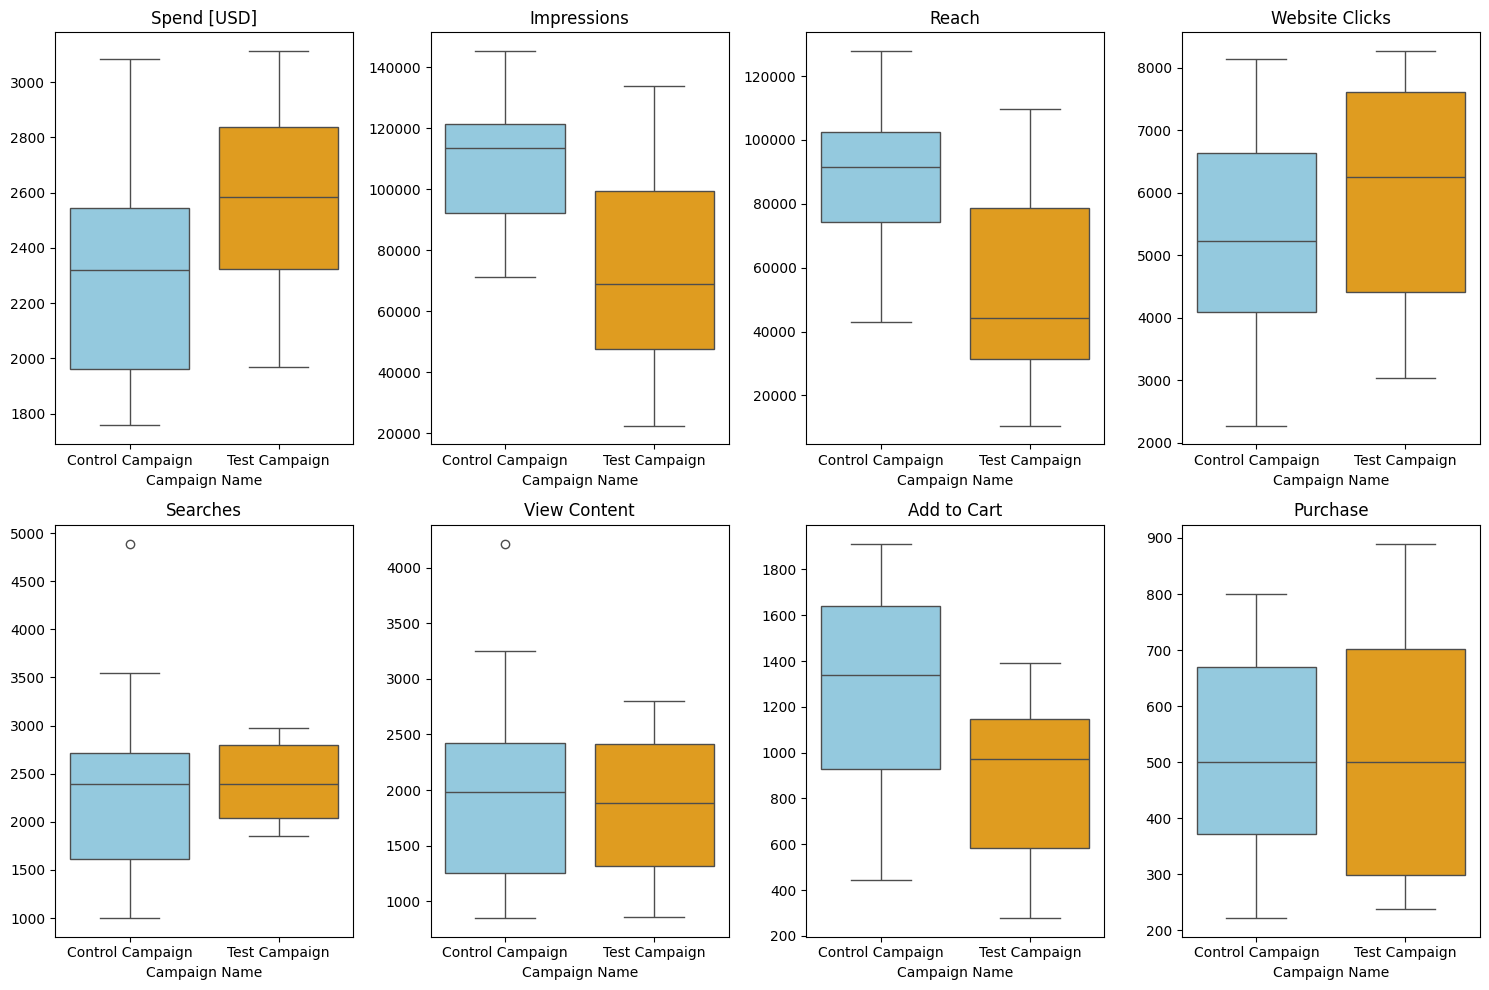

In [84]:
plot_numeric(sns.boxplot)

In [85]:
# outlier percentage 
numeric_cols = df.select_dtypes(include=["int"]).columns.to_list()
numeric_cols.remove("Day")

outlier_percentages = {}
for col in numeric_cols : 
    outlier_percentage = check_outlier(df, col)
    outlier_percentages[col] = outlier_percentage 
    
outlier_df = pd.DataFrame(outlier_percentages.items(), columns=["Feature","Outlier Percentage"])
outlier_df


,Feature,Outlier Percentage
0,Spend [USD],0.000000
1,Impressions,0.000000
2,Reach,0.000000
3,Website Clicks,0.000000
4,Searches,1.694915
5,View Content,1.694915
6,Add to Cart,0.000000
7,Purchase,0.000000
8,year,0.000000
9,month,0.000000


In [86]:
removable_outlier = outlier_df[(outlier_df['Outlier Percentage']>0) & (outlier_df['Outlier Percentage']<3)]
for feature in removable_outlier.Feature:
    df = remove_outlier(df,feature)

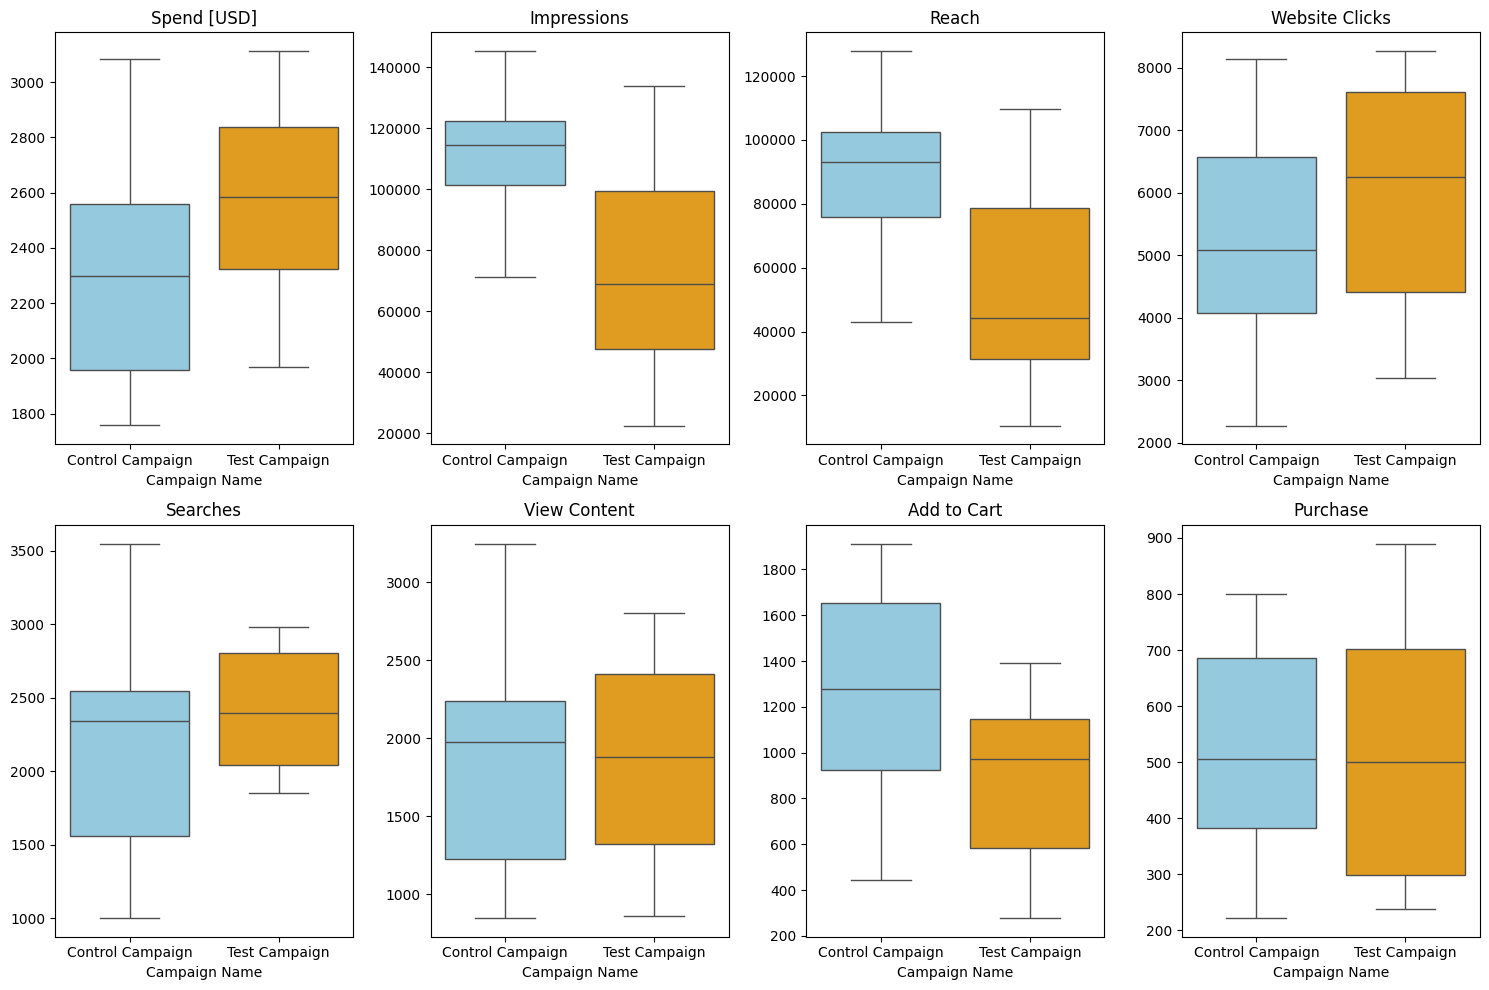

In [87]:
plot_numeric(sns.boxplot)

In [88]:
#Summary Statistics

pd.set_option("display.max_columns",None)
df.drop(columns=["Day"]).groupby("Campaign Name").describe()

Spend [USD]                                                   \
                       count         mean         std     min     25%     50%   
Campaign Name                                                                   
Control Campaign        28.0  2301.535714  369.944989  1757.0  1956.5  2299.5   
Test Campaign           30.0  2563.066667  348.687681  1968.0  2324.5  2584.0   

                                  Impressions                               \
                      75%     max       count           mean           std   
Campaign Name                                                                
Control Campaign  2557.00  3083.0        28.0  110185.857143  21818.408023   
Test Campaign     2836.25  3112.0        30.0   74584.800000  32121.377422   

                                                                    Reach  \
                      min        25%       50%        75%       max count   
Campaign Name                                                               
Control Campaign  71274.0  101243.25  114338.5  122223.25  145248.0  28.0   
Test Campaign     22521.0   47541.25   68853.5   99500.00  133771.0  30.0   

                                                                          \
                          mean           std      min       25%      50%   
Campaign Name                                                              
Control Campaign  89368.250000  22046.974382  42859.0  76022.25  93237.5   
Test Campaign     53491.566667  28795.775752  10598.0  31516.25  44219.5   

                                      Website Clicks               \
                        75%       max          count         mean   
Campaign Name                                                       
Control Campaign  102487.50  127852.0           28.0  5220.571429   
Test Campaign      78778.75  109834.0           30.0  6032.333333   

                                                                         \
                          std     min      25%     50%      75%     max   
Campaign Name                                                             
Control Campaign  1703.130482  2277.0  4070.75  5082.5  6572.50  8137.0   
Test Campaign     1708.567263  3038.0  4407.00  6242.5  7604.75  8264.0   

                 Searches                                                   \
                    count         mean         std     min     25%     50%   
Campaign Name                                                                
Control Campaign     28.0  2125.964286  710.276810  1001.0  1560.5  2340.0   
Test Campaign        30.0  2418.966667  388.742312  1854.0  2043.0  2395.5   

                                  View Content                           \
                      75%     max        count         mean         std   
Campaign Name                                                             
Control Campaign  2543.00  3549.0         28.0  1862.535714  654.520208   
Test Campaign     2801.25  2978.0         30.0  1858.000000  597.654669   

                                                        Add to Cart  \
                    min     25%     50%     75%     max       count   
Campaign Name                                                         
Control Campaign  848.0  1224.0  1979.5  2239.5  3249.0        28.0   
Test Campaign     858.0  1320.0  1881.0  2412.0  2801.0        30.0   

                                                                         \
                         mean         std    min    25%     50%     75%   
Campaign Name                                                             
Control Campaign  1293.357143  413.332636  442.0  924.5  1279.0  1654.5   
Test Campaign      881.533333  347.584248  278.0  582.5   974.0  1148.5   

                         Purchase                                        \
                     max    count        mean         std    min    25%   
Campaign Name                                                             
Control

## Correlation Analysis

<Axes: >

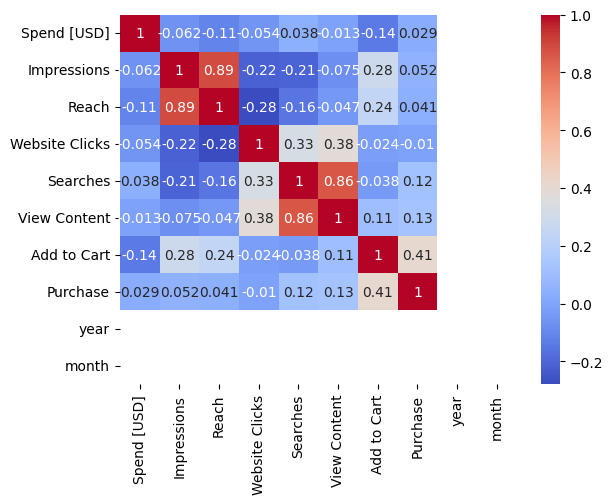

In [89]:
corr_matrix = df.drop(columns=["Campaign Name", "Day"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

### Insights

- Impression & Reach(0.89) , Searchs & View content(0.86) are Highly corrlated. 
- Spend & Purchase(0.029) = it means that ad spend may not affect conversion 

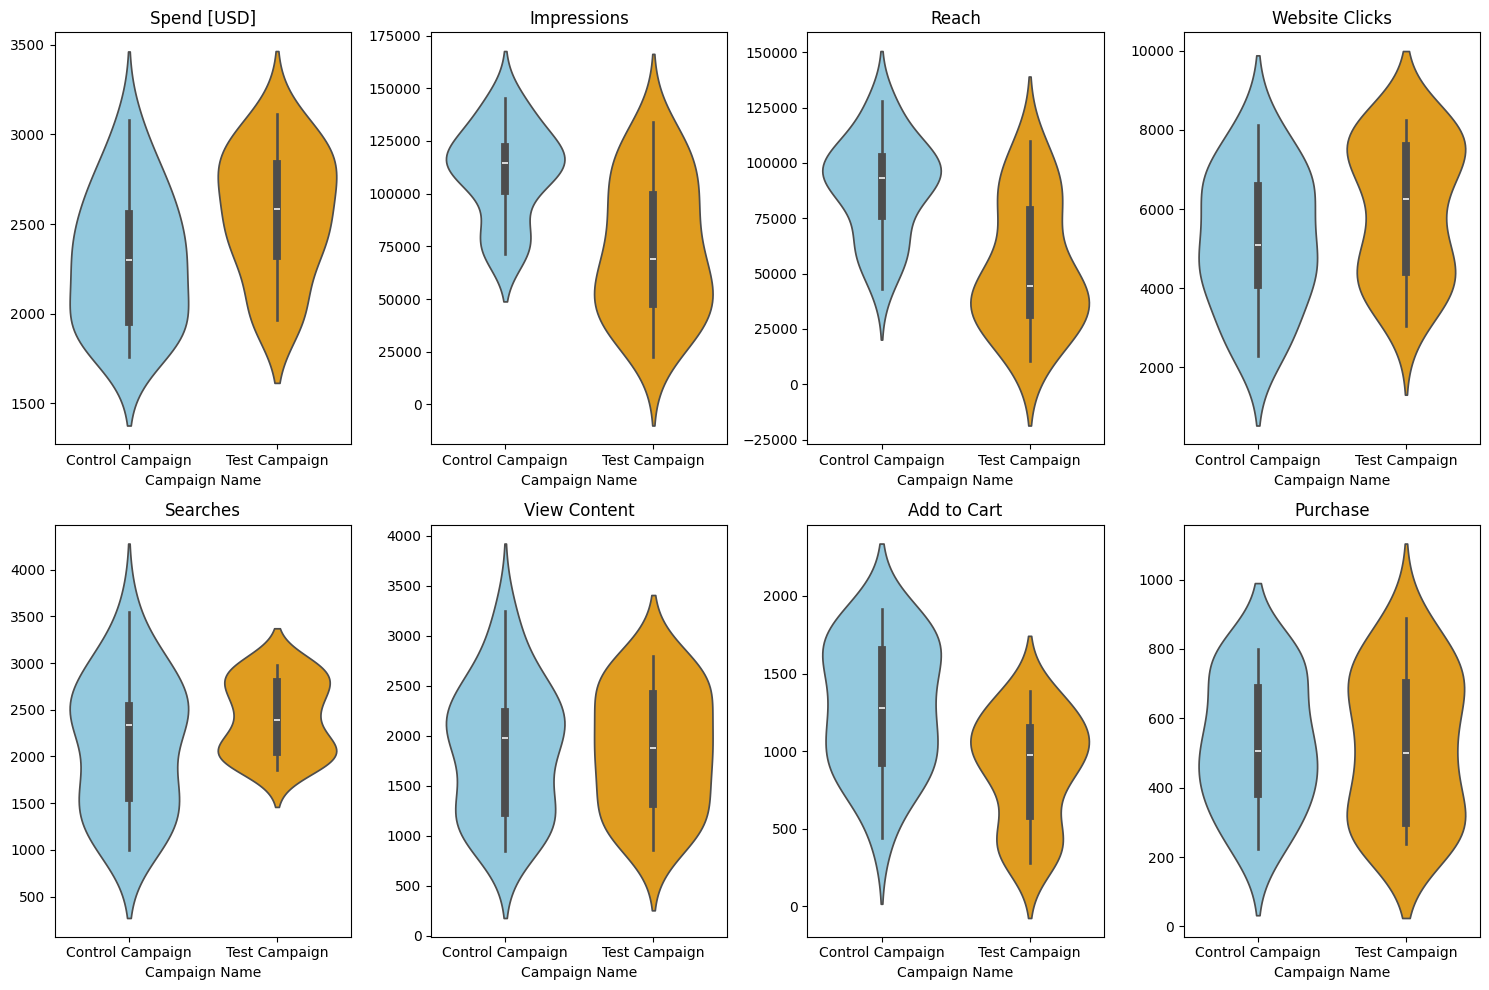

In [90]:
plot_numeric(sns.violinplot)

In [91]:
df.head(5)

,Campaign Name,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,year,month,Day
0,Control Campaign,2280,82702,56930,7016,2290,2159,1819,618,2019,8,1
1,Control Campaign,1757,121040,102513,8110,2033,1841,1219,511,2019,8,2
2,Control Campaign,2343,131711,110862,6508,1737,1549,1134,372,2019,8,3
3,Control Campaign,1940,72878,61235,3065,1042,982,1183,340,2019,8,4
5,Control Campaign,3083,109076,87998,4028,1709,1249,784,764,2019,8,6


# Calculate & Compare CTR & CR

Click Through Rate (CTR) = (Total Clicks / Total Impressions) * 100
    - How many people click & see the contents shown to them ? (Impression=Exposure)
Conversion Rate(CR) = (Total Purchase / Total Clicks) * 100
    - How many people buy the things they clicked


In [92]:
df['CTR'] = df['Website Clicks'] /df['Impressions']
df['CR'] = df['Purchase'] / df['Website Clicks']

df.head(5)

,Campaign Name,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase,year,month,Day,CTR,CR
0,Control Campaign,2280,82702,56930,7016,2290,2159,1819,618,2019,8,1,0.084835,0.088084
1,Control Campaign,1757,121040,102513,8110,2033,1841,1219,511,2019,8,2,0.067003,0.063009
2,Control Campaign,2343,131711,110862,6508,1737,1549,1134,372,2019,8,3,0.049411,0.057160
3,Control Campaign,1940,72878,61235,3065,1042,982,1183,340,2019,8,4,0.042057,0.110930
5,Control Campaign,3083,109076,87998,4028,1709,1249,784,764,2019,8,6,0.036928,0.189672


In [93]:
# Aggregate metrics by campaigns 

metrics = ['CTR','CR']

average_metrics = df.groupby('Campaign Name')[metrics].mean().reset_index()
average_metrics


,Campaign Name,CTR,CR
0,Control Campaign,0.049625,0.117403
1,Test Campaign,0.102423,0.092312


In [94]:
summary_stats = df.groupby('Campaign Name').agg({'CTR':['mean','median','std','min','max'],
                                                 'CR':['mean','median','std','min','max']})

summary_stats

CTR                                                CR  \
                      mean    median       std       min       max      mean   
Campaign Name                                                                  
Control Campaign  0.049625  0.045792  0.019561  0.018575  0.084835  0.117403   
Test Campaign     0.102423  0.080359  0.067709  0.029824  0.338218  0.092312   

                                                          
                    median       std       min       max  
Campaign Name                                             
Control Campaign  0.106602  0.068126  0.033494  0.322354  
Test Campaign     0.084543  0.044490  0.030088  0.210851

CTR
higher CTR means ad that affects to the customers
- Control campaign : 0.049
- Test campaign : 0.102 

Test CTR has higher CTR mean, mentioning that the test ad is more impactful.

CR  
higher CR means better conversion of clicks into purchases
- Control Campaign : 0.117
- Test Campaign : 0.09

Control Campaign has a higher CR, suggesting that the prior ad is more effective in converting clicks into purchases.
it converts those clicks to purchases at a lower late


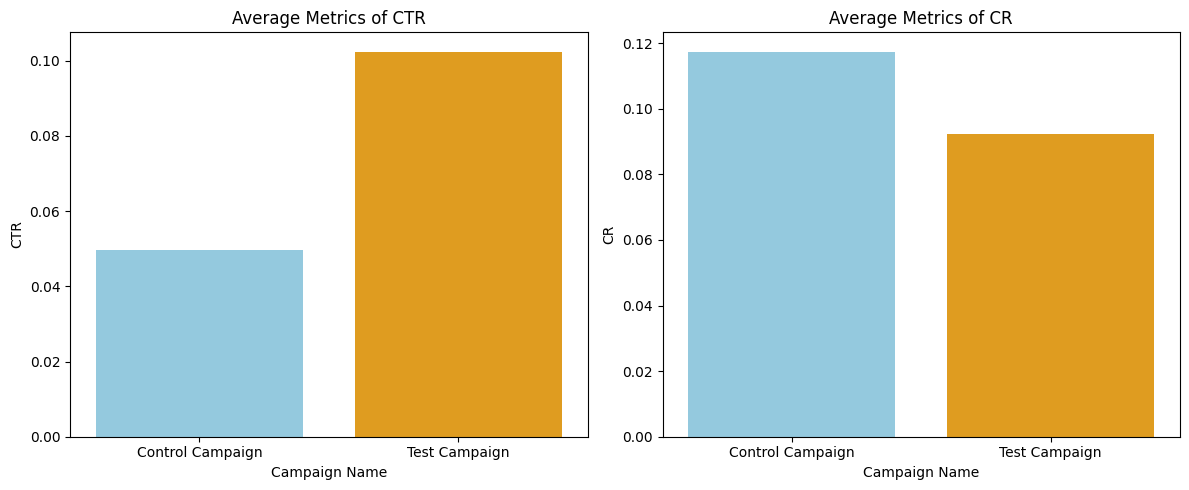

In [95]:
# Visualize the Metrics 

fig, axes = plt.subplots(1,2, figsize=(12,5))

for i, col in enumerate(average_metrics.columns): 
    
    if col != 'Campaign Name':
        plt.subplot(1, 2, i)
        sns.barplot(data=average_metrics, x='Campaign Name', y=col, palette=["skyblue","orange"])
        
        plt.title(f'Average Metrics of {col}')
        plt.legend().remove()
        
plt.tight_layout()
plt.show()

        

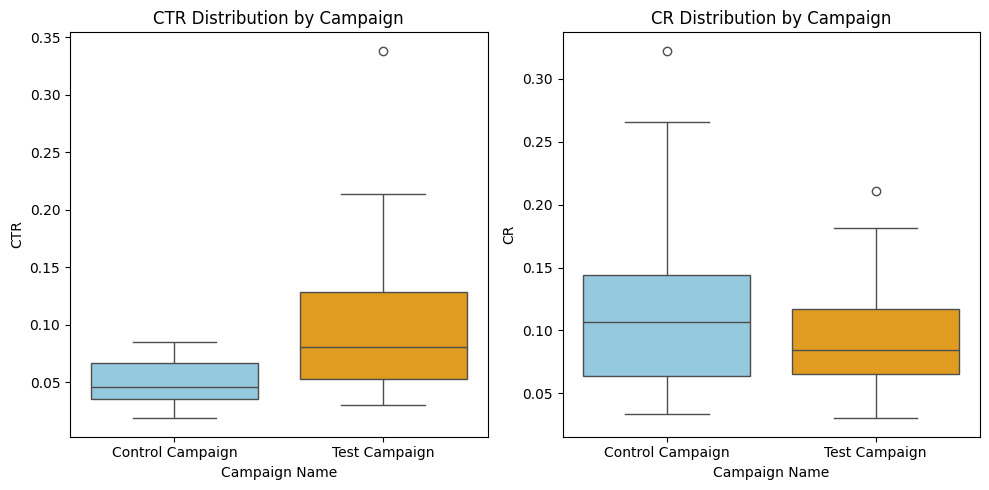

In [96]:
#Box plot 

fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(x='Campaign Name', y='CTR', data=df, hue='Campaign Name',palette=["skyblue","orange"], ax=axes[0])
axes[0].set_title('CTR Distribution by Campaign')
axes[0].legend().remove()

sns.boxplot(x='Campaign Name', y='CR', data=df, hue='Campaign Name',palette=["skyblue","orange"], ax=axes[1])
axes[1].set_title('CR Distribution by Campaign')
axes[1].legend().remove()


plt.tight_layout()
plt.show()

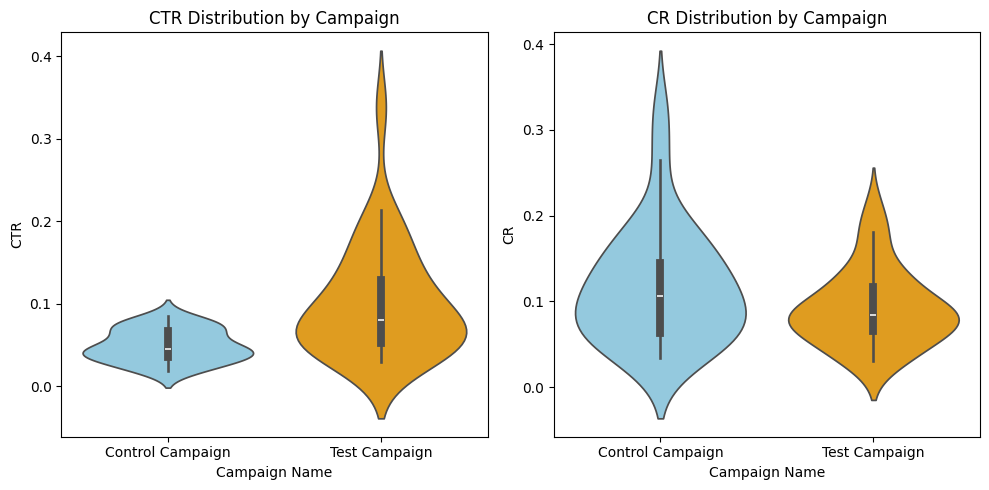

In [97]:
# Violin plots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(x='Campaign Name', y='CTR', data=df, 
               hue='Campaign Name', dodge=False,palette=["skyblue","orange"], ax=axes[0])
axes[0].set_title('CTR Distribution by Campaign')
axes[0].legend().remove()

sns.violinplot(x='Campaign Name', y='CR',  data=df, 
               hue='Campaign Name',palette=["skyblue","orange"],ax=axes[1])
axes[1].set_title('CR Distribution by Campaign')
axes[1].legend().remove()

plt.tight_layout()
plt.show()

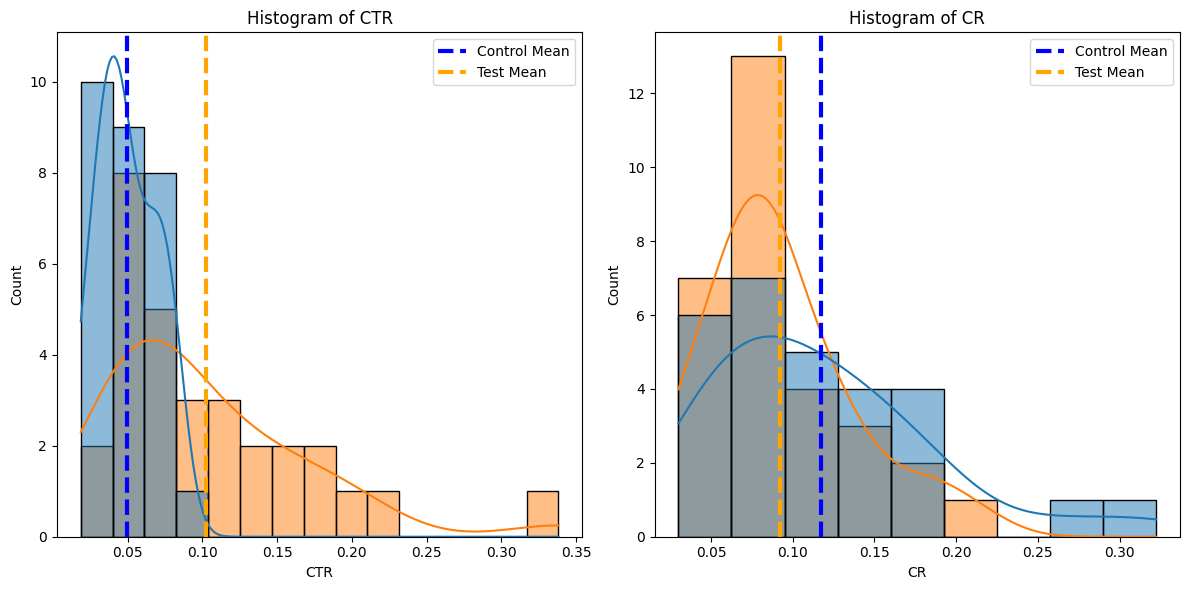

In [98]:
# Replace infinite values with NaN
# ab_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Creating the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6),  )

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each metric and create a histogram plot
for i, col in enumerate(metrics):
    sns.histplot(data=df, x=col, hue='Campaign Name', 
                 kde=True, palette='tab10', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    
    # Add mean lines for Control and Test campaigns
    control_mean = average_metrics[average_metrics['Campaign Name'] == 
                                   'Control Campaign'][col].values[0]
    test_mean = average_metrics[average_metrics['Campaign Name'] == 
                                'Test Campaign'][col].values[0]
    
    axes[i].axvline(control_mean, color='blue', linestyle='dashed', 
                    linewidth=3, label='Control Mean')
    axes[i].axvline(test_mean, color='orange', linestyle='dashed', 
                    linewidth=3, label='Test Mean')

    # Add legend
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

4. CTR (Click Through Rate) - Hypothesis Testing¶

Formulate the Hypotheses 

- Null Hypothesis (H0) : 

The mean CTR of the Control Campaign is equal to the mean CTR of the Test Campaign


- Alternative Hypothesis (H1) : 
The mean CTR of the Control Campaign is not equal to the mean CTR of the Test Campaign

### Calculate CTR for Each Campaign 

In [99]:
control_data=df[df['Campaign Name']=='Control Campaign']
control_ctr=control_data['CTR']

In [100]:
test_data = df[df['Campaign Name'] == 'Test Campaign']
test_ctr = test_data['CTR']

In [101]:
# Check for normality & Equity Variances 

# we can use the t-test if the sample size is small and the data is normally distributed, or the z-test if the sample size is large. 

In [102]:
# Normality test 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 29
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign Name   58 non-null     object 
 1   Spend [USD]     58 non-null     int64  
 2   Impressions     58 non-null     int64  
 3   Reach           58 non-null     int64  
 4   Website Clicks  58 non-null     int64  
 5   Searches        58 non-null     int64  
 6   View Content    58 non-null     int64  
 7   Add to Cart     58 non-null     int64  
 8   Purchase        58 non-null     int64  
 9   year            58 non-null     int32  
 10  month           58 non-null     int32  
 11  Day             58 non-null     int32  
 12  CTR             58 non-null     float64
 13  CR              58 non-null     float64
dtypes: float64(2), int32(3), int64(8), object(1)
memory usage: 8.2+ KB


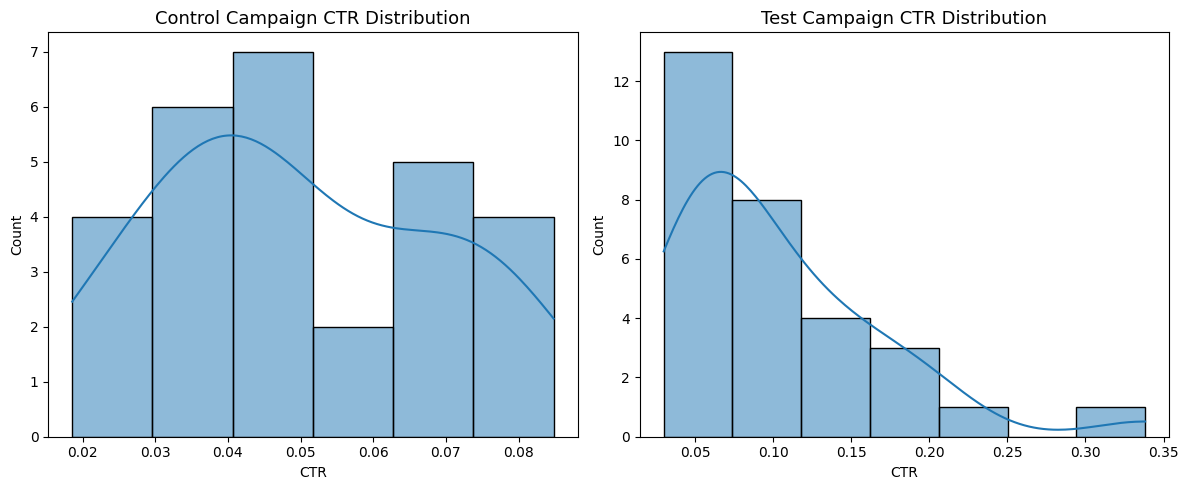

In [103]:
#Histogram 
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(control_ctr, kde=True, ax=axes[0])
axes[0].set_title('Control Campaign CTR Distribution', fontsize=13)

sns.histplot(test_ctr, kde=True, ax=axes[1])
axes[1].set_title('Test Campaign CTR Distribution', fontsize=13)

plt.tight_layout()
plt.show()


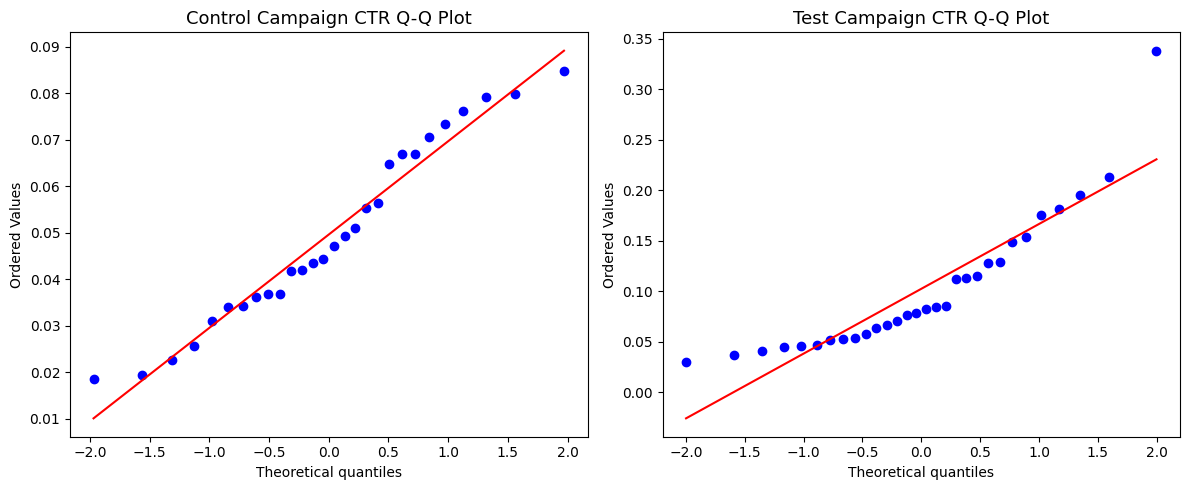

In [104]:
from scipy import stats

# Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(121)
stats.probplot(control_ctr, dist="norm", plot=plt, )
axes[0].set_title('Control Campaign CTR Q-Q Plot', fontsize=13)

plt.subplot(122)
stats.probplot(test_ctr, dist="norm", plot=plt,)
axes[1].set_title('Test Campaign CTR Q-Q Plot',fontsize=13)

plt.tight_layout()
plt.show()

In [105]:
# Check for Normality ( Shapiro-Wilk test/ perform the statistical test )

shapiro_test_ctr = shapiro(test_ctr)
shapiro_control_ctr = shapiro(control_ctr)

#Extract the test statistics and p-value 
control_stat, control_pvalue = shapiro_control_ctr 
test_stat, test_pvalue, = shapiro_test_ctr


In [106]:
#printing with formatting
print(f"Shapiro-Wilk Test for Control CTR: Stat = {control_stat:.3f}", end=", ")
print(f"p-value = {control_pvalue:.3f}")
print(f"Shapiro-Wilk Test for Test CTR: Stat = {test_stat:.3f}", end=", ")
print(f"p-value = {test_pvalue:.3f}")

Shapiro-Wilk Test for Control CTR: Stat = 0.954, p-value = 0.253
Shapiro-Wilk Test for Test CTR: Stat = 0.841, p-value = 0.000


In [107]:


from scipy.stats import ttest_ind
from scipy.stats import shapiro, kstest
from scipy.stats import levene, bartlett
from scipy.stats import mannwhitneyu




In [108]:
# Kolmogorov-Smirnov Test
kstest_control_ctr = kstest(control_ctr, 'norm')
kstest_test_ctr = kstest(test_ctr, 'norm')

print(f"Kolmogorov-Smirnov Test for Control CTR: k = {kstest_control_ctr[0]:.3f}", end=", ")
print(f"p = {kstest_control_ctr[1]:.3f}")
print(f"Kolmogorov-Smirnov for Test CTR: k = {kstest_test_ctr[0]:.3f}", end=", ")
print(f"p = {kstest_test_ctr[1]:.3f}")

Kolmogorov-Smirnov Test for Control CTR: k = 0.507, p = 0.000
Kolmogorov-Smirnov for Test CTR: k = 0.512, p = 0.000


Check for Equal Variances

In [110]:
# Levene's Test
levene_test = levene(control_ctr, test_ctr)
print(f"Levene's Test for CTR: p-value = {levene_test[1]:.3f}")

Levene's Test for CTR: p-value = 0.003


Perform the Test¶

In [112]:
# Perform the t-test for CTR
ctr_t_stat, ctr_p_value = mannwhitneyu(control_ctr, test_ctr)

print(f"CTR t-statistic: {ctr_t_stat:.3f}, p-value: {ctr_p_value:.3f}")


CTR t-statistic: 175.000, p-value: 0.000
